In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# Get the whole list of trained models
f = np.loadtxt('training_log.txt', dtype=str).T
names, penalties, models, syn, acc = f[0], f[1].astype(np.float), f[-1], f[5].astype(np.float), f[6].astype(np.float)


chosen_name = "l1-fanout-qtrain"
print(chosen_name)
idx = names == chosen_name
chosen_models = models[idx]
chosen_penalties_qtrain = penalties[idx]

acc = acc[idx]
syn = syn[idx]

# check quantization during training
was_quantized_training = f[3][idx] == 'True'
assert all(was_quantized_training)

model_weights_qtrain = []
for model in chosen_models:
    weights = torch.load(model, map_location='cpu')

    model_weights_qtrain.append([])
    for w in weights.values():
        model_weights_qtrain[-1].extend(w.numpy().ravel())
        
n_zero_qtrain = [(np.abs(w) < 0.1).sum() / len(w) for w in model_weights_qtrain]

l1-fanout-qtrain


In [62]:
# chosen_name = "l1-fanout"
# print(chosen_name)
# idx = names == chosen_name
# chosen_models = models[idx]
# chosen_penalties_noquant = penalties[idx]

# # check quantization during training
# was_quantized_training = f[3][idx] == 'True'
# assert all(~was_quantized_training)

# model_weights_noquant = []
# for model in chosen_models:
#     weights = torch.load(model, map_location='cpu')

#     model_weights_noquant.append([])
#     for w in weights.values():
#         model_weights_noquant[-1].extend(w.numpy().ravel())
        
# n_zero_noquant = [(np.abs(w) < 0.1).sum() / len(w) for w in model_weights_noquant]

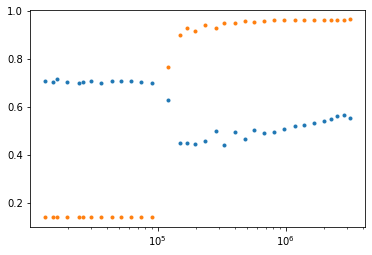

In [63]:
plt.plot(syn, n_zero_qtrain, '.')
plt.plot(syn, acc, '.')

plt.xscale('log')